In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import nltk
from multiprocessing import Pool
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
documents = pd.read_csv('../DATA/DATA.csv')

In [5]:
documents

INDEX                                               TEXT
0        A001-00  Auto 001/00\n\nDEBIDO PROCESO DE TUTELA-Notifi...
1        A001-01  Auto 001/01\n\nNULIDAD SENTENCIA DE CONSTITUCI...
2        A001-02  Auto 001/02\n \nLEGITIMACION POR PASIVA EN TUT...
3        A001-03  Auto 001/03\n\nREFERENDO-Etapas de desarrollo ...
4        A001-04  Auto 001/04\n\nCONFLICTO DE COMPETENCIA EN TUT...
...          ...                                                ...
35732   T-999-08  Sentencia T-999/08\n\nDERECHO A LA SALUD COMO ...
35733   T-999-10  Sentencia T-999/10\n\nMUJER EMBARAZADA-Deber d...
35734   T-999-12  Sentencia T-999/12\n\n\nACCION DE TUTELA DE PE...
35735   T-999-99  Sentencia T-999/99\n\nDERECHO A LA SEGURIDAD S...
35736  T-999A-01  Sentencia T-999A/01\n\nACCION DE TUTELA-Hecho ...

[35737 rows x 2 columns]

## Valores unicos

In [6]:
documents.INDEX.unique().size

35737

In [5]:
pd.concat(g for _, g in documents.groupby("INDEX") if len(g) > 1)

INDEX                                               LINK  \
8465     A001-00  https://www.corteconstitucional.gov.co/Relator...   
8466     A001-00  https://www.corteconstitucional.gov.co/Relator...   
7556     A001-03  https://www.corteconstitucional.gov.co/Relator...   
7557     A001-03  https://www.corteconstitucional.gov.co/Relator...   
8929     A003-92  https://www.corteconstitucional.gov.co/Relator...   
...          ...                                                ...   
19212   T-964-08  https://www.corteconstitucional.gov.co/Relator...   
29028   T-972-00  https://www.corteconstitucional.gov.co/Relator...   
29029   T-972-00  https://www.corteconstitucional.gov.co/Relator...   
16989   T-988-10  https://www.corteconstitucional.gov.co/Relator...   
16990   T-988-10  https://www.corteconstitucional.gov.co/Relator...   

                                                DOCUMENT  
8465    \n\n\nAuto 001/00\n\n\nAuto 001/00\n \nDEBIDO...  
8466    \n\n\nAuto 001/00\n\n\nAuto 001/00\n \nDEBIDO...  
7556    \n\n\nOCR Document\n\n\nAuto 001/03\n \nREFER...  
7557    \n\n\nOCR Document\n\n\nAuto 001/03\n \nREFER...  
8929   \n \nAUTO -003\nde marzo 3 de 1992\n \n \nDEMA...  
...                                                  ...  
19212   \n\n\nREPÚBLICA DE COLOMBIA\n\n\nSentencia T-...  
29028   \n\n\nSentencia T-972/00\n\r\n<!--\r\n /* Fon...  
29029   \n\n\nSentencia T-972/00\n\r\n<!--\r\n /* Fon...  
16989  \nSentencia T-988/10\n \nLICENCIA DE MATERNIDA...  
16990  \nSentencia T-988/10\n \nLICENCIA DE MATERNIDA...  

[944 rows x 3 columns]

In [6]:
documents.drop_duplicates(subset ="INDEX",
                     keep = False, inplace = True)

In [7]:
documents

INDEX                                               LINK  \
0        A107-21  https://www.corteconstitucional.gov.co/Relator...   
1        A106-21  https://www.corteconstitucional.gov.co/Relator...   
2        A092-21  https://www.corteconstitucional.gov.co/Relator...   
3        A091-21  https://www.corteconstitucional.gov.co/Relator...   
4        A090-21  https://www.corteconstitucional.gov.co/Relator...   
...          ...                                                ...   
35415   C-417-92  https://www.corteconstitucional.gov.co/Relator...   
35416   C-416-92  https://www.corteconstitucional.gov.co/Relator...   
35417   C-221-92  https://www.corteconstitucional.gov.co/Relator...   
35418   C-005-92  https://www.corteconstitucional.gov.co/Relator...   
35419   C-004-92  https://www.corteconstitucional.gov.co/Relator...   

                                                DOCUMENT  
0      \nAuto 107/21\n \n \nReferencia: Expediente T-...  
1      \nAuto 106/21\n \n \nReferencia: Expediente T-...  
2      \nAuto 092/21\n \n \nReferencia: respuesta a l...  
3      \nAuto 091/21\n \n \nReferencia: requerimiento...  
4      \nAuto 090/21\n \n \nReferencia: Expediente T-...  
...                                                  ...  
35415   \n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...  
35416   \n\n\nSentencia No\n\r\n<!--\r\n /* Font Defi...  
35417   \n\n\nSentencia de Constitucionalidad de Mayo...  
35418   \n\n\n \n\r\n<!--\r\n /* Font Definitions */\...  
35419   \n\n\nSentencia Revisón de Constitucionalidad...  

[34477 rows x 3 columns]

In [8]:
documents.INDEX.unique().size

34477

## Longitud de los documentos

In [8]:
documents["DOCUMENT_SIZE"] = [len(x) for x in documents.TEXT]

In [9]:
documents

INDEX                                               TEXT  \
0        A001-00  Auto 001/00\n\nDEBIDO PROCESO DE TUTELA-Notifi...   
1        A001-01  Auto 001/01\n\nNULIDAD SENTENCIA DE CONSTITUCI...   
2        A001-02  Auto 001/02\n \nLEGITIMACION POR PASIVA EN TUT...   
3        A001-03  Auto 001/03\n\nREFERENDO-Etapas de desarrollo ...   
4        A001-04  Auto 001/04\n\nCONFLICTO DE COMPETENCIA EN TUT...   
...          ...                                                ...   
35732   T-999-08  Sentencia T-999/08\n\nDERECHO A LA SALUD COMO ...   
35733   T-999-10  Sentencia T-999/10\n\nMUJER EMBARAZADA-Deber d...   
35734   T-999-12  Sentencia T-999/12\n\n\nACCION DE TUTELA DE PE...   
35735   T-999-99  Sentencia T-999/99\n\nDERECHO A LA SEGURIDAD S...   
35736  T-999A-01  Sentencia T-999A/01\n\nACCION DE TUTELA-Hecho ...   

       DOCUMENT_SIZE  
0               4562  
1              16300  
2              16719  
3               8183  
4              12393  
...              ...  
35732          77241  
35733          30682  
35734          37280  
35735          17573  
35736          14226  

[35737 rows x 3 columns]

Text(0, 0.5, 'Longitud en caracteres del documento')

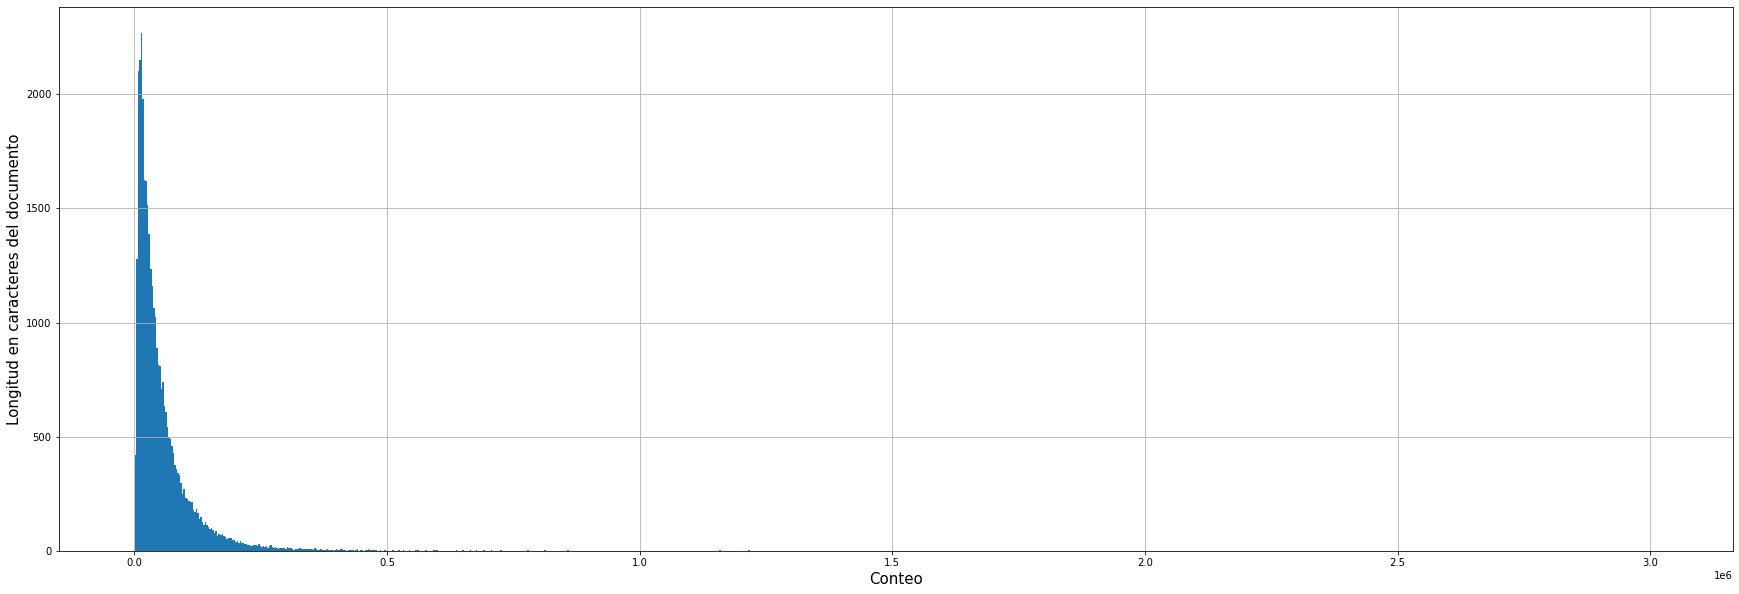

In [10]:
plt.figure(figsize=(30, 10))
documents['DOCUMENT_SIZE'].hist(bins=1000)
plt.xlabel("Conteo", fontsize=15)
plt.ylabel("Longitud en caracteres del documento",fontsize=15)


In [11]:
documents['DOCUMENT_SIZE'].iloc[documents["DOCUMENT_SIZE"].argmax()]

3012765

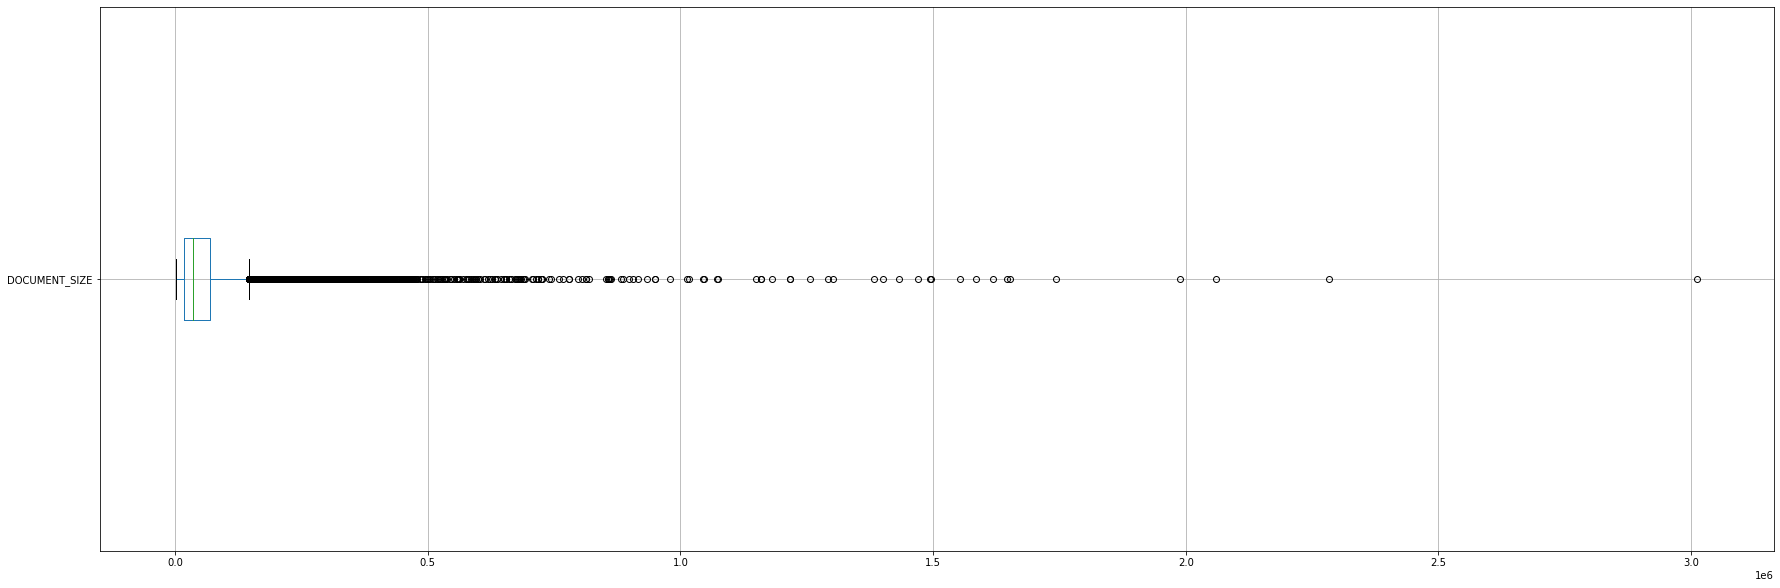

In [12]:
plt.figure(figsize=(30, 10))
boxplot = documents.boxplot(column=['DOCUMENT_SIZE'], vert=False)

In [13]:
outlier_documents = documents.loc[documents['DOCUMENT_SIZE'] > 100000].sort_values(by=['DOCUMENT_SIZE'])
outlier_documents

INDEX                                               TEXT  \
3106     A119-07  Auto 119/07\n\nREQUISITO DE ANUNCIO PREVIO DE ...   
12486   C-346-17  Sentencia C-346/17\n\n\nPREVISION LEGAL CONTEN...   
25765   T-376-14  Sentencia T-376/14\n\n\nACCION DE TUTELA CONTR...   
13500   C-487-02  Sentencia C-487/02\n\nACTO LEGISLATIVO-Caducid...   
13170   C-437-13  Sentencia C-437/13\n\n\nTERMINO PARA REFORMAR ...   
...          ...                                                ...   
12547   C-355-06  Sentencia C-355/06\n\nEXCEPCION DE PLEITO PEND...   
14723   C-674-17  Sentencia C-674/17\n\nREFORMA A LA ESTRUCTURA ...   
25990   T-388-13  Sentencia T-388/13\n\n\nESTADO DE COSAS INCONS...   
10061  C-1040-05  Sentencia C-1040/05\n\nSUSTITUCION DE LA CONST...   
9762    C-080-18  Sentencia C-080/18\n\nINSTRUMENTOS PARA FACILI...   

       DOCUMENT_SIZE  
3106          100030  
12486         100036  
25765         100043  
13500         100071  
13170         100077  
...              ...  
12547        1744082  
14723        1989109  
25990        2060602  
10061        2284453  
9762         3012765  

[5090 rows x 3 columns]

In [15]:
outlier_documents['LINK'].iloc[1410]

'https://www.corteconstitucional.gov.co/Relatoria/1997/T-643-97.htm'

In [15]:
outlier_documents['TEXT'].iloc[-1]

'Sentencia C-080/18\n\nINSTRUMENTOS PARA FACILITAR Y ASEGURAR LA IMPLEMENTACION Y DESARROLLO NORMATIVO DEL ACUERDO FINAL PARA LA TERMINACION DEL CONFLICTO Y CONSTRUCCION DE UNA PAZ ESTABLE Y DURADERA-Procedimiento legislativo especial para la paz (fast track)\n\nPROYECTO DE LEY ESTATUTARIA DE LA ADMINISTRACION DE JUSTICIA EN LA JURISDICCION ESPECIAL PARA LA PAZ-Control automático de constitucionalidad\n\nPROCEDIMIENTO LEGISLATIVO ESPECIAL PARA LA PAZ-Parámetros de forma y de trámite impuestos por el Acto Legislativo 01 de 2016\n\nPROCEDIMIENTO LEGISLATIVO ESPECIAL PARA LA PAZ-Requisitos de competencia en el proceso de formación de las leyes estatutarias expedidas mediante dicho procedimiento\n\nPROYECTOS DE LEY Y ACTO LEGISLATIVO TRAMITADOS MEDIANTE EL PROCEDIMIENTO LEGISLATIVO ESPECIAL-Exigencia de conexidad con el Acuerdo Final\n\nPROYECTO DE LEY ESTATUTARIA DE LA ADMINISTRACION DE JUSTICIA EN LA JURISDICCION ESPECIAL PARA LA PAZ-Regulación mediante Ley Estatutaria\n\nEl mencionado P

In [17]:
test_text = outlier_documents['DOCUMENT'].iloc[-1]

In [18]:
test_result = test_text.replace("   ", "")

In [19]:
print(test_result[-100000:])


inter-ideograph'><i><span lang=ES-CO style='font-size:14.0pt;font-family:"Arial","sans-serif"'>&nbsp;</span></i></p>

<p class=MsoNormal style='margin-top:0cm;margin-right:16.75pt;margin-bottom:
0cm;margin-left:14.2pt;margin-bottom:.0001pt;text-align:justify;text-justify:
inter-ideograph'><i><span lang=ES-CO style='font-size:14.0pt;font-family:"Arial","sans-serif"'>“Por
último, la Corte se pregunta ¿cuál es el efecto jurídico de considerar que los
jurados de derecho son particulares que administran justicia?</span></i></p>

<p class=MsoNormal style='margin-top:0cm;margin-right:16.75pt;margin-bottom:
0cm;margin-left:14.2pt;margin-bottom:.0001pt;text-align:justify;text-justify:
inter-ideograph'><i><span lang=ES-CO style='font-size:14.0pt;font-family:"Arial","sans-serif"'>&nbsp;</span></i></p>

<p class=MsoNormal style='margin-top:0cm;margin-right:16.75pt;margin-bottom:
0cm;margin-left:14.2pt;margin-bottom:.0001pt;text-align:justify;text-justify:
inter-ideograph'><i><span lang=ES-CO styl

In [20]:
documents["DOCUMENT"] = [x.replace("   ", "") for x in tqdm(documents.DOCUMENT)]

100%|██████████| 34477/34477 [00:33<00:00, 1020.28it/s] 


In [21]:
outlier_documents = documents.loc[documents['DOCUMENT_SIZE'] > 100000].sort_values(by=['DOCUMENT_SIZE'])
outlier_documents

INDEX                                               LINK  \
9528     T-457-19  https://www.corteconstitucional.gov.co/Relator...   
11048    T-239-17  https://www.corteconstitucional.gov.co/Relator...   
10905    T-446-17  https://www.corteconstitucional.gov.co/Relator...   
26930    C-521-02  https://www.corteconstitucional.gov.co/Relator...   
30499    T-610-99  https://www.corteconstitucional.gov.co/Relator...   
...           ...                                                ...   
32228    T-330-97  https://www.corteconstitucional.gov.co/Relator...   
28910   T-1135-00  https://www.corteconstitucional.gov.co/Relator...   
28715   T-1431-00  https://www.corteconstitucional.gov.co/Relator...   
28652   T-1532-00  https://www.corteconstitucional.gov.co/Relator...   
33328    C-037-96  https://www.corteconstitucional.gov.co/Relator...   

                                                DOCUMENT  DOCUMENT_SIZE  
9528   \nSentencia\r\nT-457/19\n \nDERECHO A LA EDUCA...         100024  
11048  \nSentencia T-239/17\n \n \nCARENCIA\r\nACTUAL...         100029  
10905  \nSentencia T-446/17\n \n \nRECONOCIMIENTO\r\n...         100031  
26930   \n\n\nREPUBLICA DE COLOMBIA\n\r\n<!--\r\n /* ...         100039  
30499   \n\n\nSentencia T-610/99\n\r\n<!--\r\n /* Fon...         100070  
...                                                  ...            ...  
32228   \n\n\nSentencia T-330/97\n\r\n<!--\r\n /* Fon...        7152810  
28910   \n\n\nSentencia T-1135/00\n\r\n<!--\r\n /* Fo...        8019444  
28715   \n\n\nSentencia T-1431/00\n\r\n<!--\r\n /* Fo...        8713872  
28652   \n\n\nSentencia T-1532/00\n\r\n<!--\r\n /* Fo...       10012036  
33328   \n\n\nLEY ESTATUTARIA JUSTICIA\n<!-- -->\n<!-...       12052992  

[11679 rows x 4 columns]

In [22]:
from bs4 import BeautifulSoup

def clean_text(text):
    """
    Limpiar textos de codigo residual
    """
    text = text.replace("p class", "<p class")
    text = text.replace("span la", "<span la")
    text = text.replace("i>span", "<i>span")
    text = text.replace("i>", "<i>")
    text = text.replace("/span", "</span")
    text = text.replace("span\r\nlang", "<span\r\nlang")
    text = text.replace("u>", "<u>")
    text = text.replace("span\r\n style", "<span\r\n style")
    
    soup = BeautifulSoup(text)
    text = soup.get_text()
    text = text.lower()
    
    text = text.replace("//p>", "")
    text = text.replace("/p>", "")
    text = text.replace("b>", "")
    text = text.replace("/b>", "")
    text = text.replace("/div>", "")
    text = text.replace("/body>", "")
    text = text.replace("/html>", "")
    text = text.replace("/", "")
    text = text.replace("<", "")
    text = text.replace(">", "")
    
    #text = re.sub("p class([\s\S]*)pt'>", "", text)
    #text = re.sub("/i([\s\S]*)>", "", text)
    
    return text

In [23]:
documents["DOCUMENT"] = [clean_text(x) for x in tqdm(documents.DOCUMENT)]

100%|██████████| 34477/34477 [08:07<00:00, 70.76it/s] 


In [24]:
documents["DOCUMENT_SIZE"] = [len(x) for x in documents.DOCUMENT]

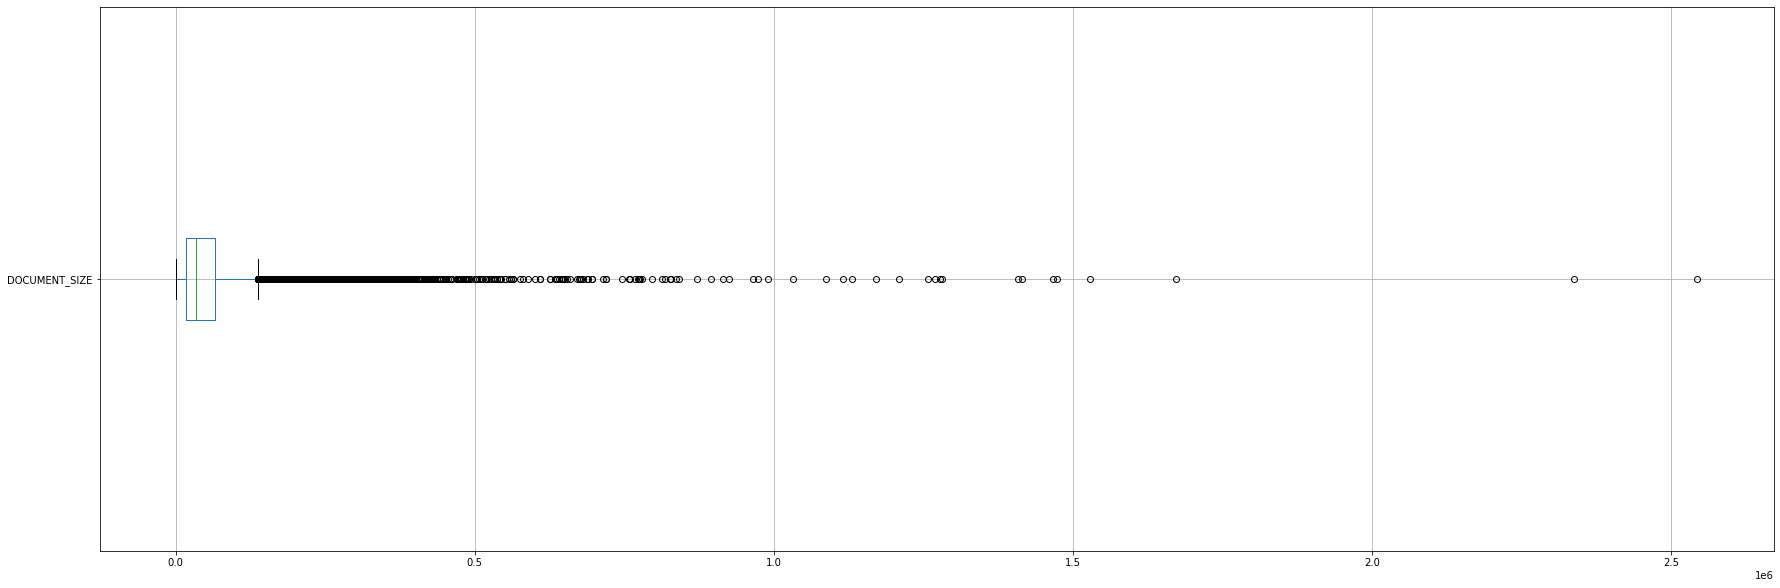

In [25]:
plt.figure(figsize=(30, 10))
boxplot = documents.boxplot(column=['DOCUMENT_SIZE'], vert=False)

In [29]:
documents['LINK'].iloc[documents["DOCUMENT_SIZE"].argmax()]

'https://www.corteconstitucional.gov.co/Relatoria/2018/C-080-18.htm'

In [28]:
print(documents['DOCUMENT'].iloc[documents["DOCUMENT_SIZE"].argmax()])

sentencia c-08018
 
instrumentos para facilitar y asegurar la implementacion y
desarrollo normativo del acuerdo final para la terminacion del conflicto y
construccion de una paz estable y duradera-procedimiento legislativo especial para la paz (fast
track)
 
proyecto de ley estatutaria de la administracion de
justicia en la jurisdiccion especial para la paz-control
automático de constitucionalidad
 
procedimiento legislativo especial para la paz-parámetros de forma y de trámite impuestos por el acto
legislativo 01 de 2016
 
procedimiento legislativo especial para la paz-requisitos de competencia en el proceso de formación
de las leyes estatutarias expedidas mediante dicho procedimiento
 
proyectos de ley y acto legislativo tramitados
mediante el procedimiento legislativo especial-exigencia de conexidad con el acuerdo final
 
proyecto de ley estatutaria de la administracion de
justicia en la jurisdiccion especial para la paz-regulación mediante ley estatutaria
 
el
mencionado proyecto d

In [30]:
documents.pop("DOCUMENT_SIZE")

0          6688
1         13987
2          3312
3          3838
4         18362
          ...  
35415     30308
35416     61819
35417     35538
35418     47209
35419    132662
Name: DOCUMENT_SIZE, Length: 34477, dtype: int64

In [31]:
documents

INDEX                                               LINK  \
0        A107-21  https://www.corteconstitucional.gov.co/Relator...   
1        A106-21  https://www.corteconstitucional.gov.co/Relator...   
2        A092-21  https://www.corteconstitucional.gov.co/Relator...   
3        A091-21  https://www.corteconstitucional.gov.co/Relator...   
4        A090-21  https://www.corteconstitucional.gov.co/Relator...   
...          ...                                                ...   
35415   C-417-92  https://www.corteconstitucional.gov.co/Relator...   
35416   C-416-92  https://www.corteconstitucional.gov.co/Relator...   
35417   C-221-92  https://www.corteconstitucional.gov.co/Relator...   
35418   C-005-92  https://www.corteconstitucional.gov.co/Relator...   
35419   C-004-92  https://www.corteconstitucional.gov.co/Relator...   

                                                DOCUMENT  
0      auto 10721\n \n \nreferencia: expediente t-7.9...  
1      auto 10621\n \n \nreferencia: expediente t-6.8...  
2      auto 09221\n \n \nreferencia: respuesta a la s...  
3      auto 09121\n \n \nreferencia: requerimiento al...  
4      auto 09021\n \n \nreferencia: expediente t- 7....  
...                                                  ...  
35415  sentencia no\n\r\n\r\n\n\nsentencia no. c-4179...  
35416  sentencia no\n\r\n\r\n\n\nsentencia no.\r\nc-4...  
35417  sentencia de constitucionalidad de mayo 92\n\r...  
35418   \nsentencia no.\r\nc-00592\n \n    emergencia...  
35419  sentencia revisón de constitucionalidad de may...  

[34477 rows x 3 columns]

In [33]:
file_name = 'documents_V1.1.csv'
documents.to_csv(file_name, encoding='utf-8', index= False)